# Visualizing statistical relationships

统计分析是一个了解数据集中变量如何相互关联以及这些关系如何依赖于其他变量的过程。可视化可以是这个过程的核心组成部分，因为当数据正确可视化时，人类视觉系统可以看到表明关系的趋势和模式。

在本教程中，我们将讨论三种 seaborn 函数。我们最常使用的是 `relplot()`。这是一个 `figure-level` 函数，用于使用两种常见方法可视化统计关系：scatter plots 和 line plots。`relplot()` 将 `FacetGrid` 与两个 axes-level 函数之一相结合：

- `scatterplot()` (with kind="scatter"; the default)
- `lineplot()` (with kind="line")

正如我们将看到的，这些函数非常具有启发性，因为它们使用了简单且容易理解的数据表示，但这些表示可以表示复杂的数据集结构。它们可以这样做，因为它们绘制二维图形，可以通过使用色调、大小和样式的语义映射最多三个额外的变量来增强这些图形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plots

散点图是统计可视化的主要方法。它使用点云来描述两个变量的联合分布，其中每个点代表数据集中的一次 observation 。这种描述可以让眼睛推断出它们之间是否有任何有意义的关系的大量信息。

在 seaborn 绘制散点图有几种方法。当两个变量都是数字时，应该使用最基本的 `scatterplot()` 函数。在分类可视化教程中，我们将看到使用散点图来可视化分类数据的专用工具。`scatterplot()` 是 `relplot()` 中的默认类型(也可以通过设置`kind="scatter"` 强制执行)

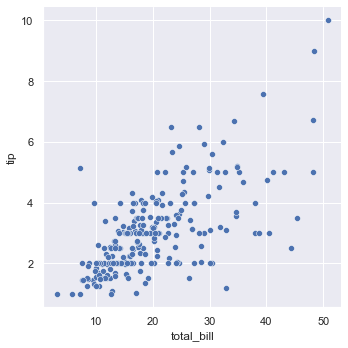

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

虽然这些点是在二维中绘制的，但可以通过根据第三个变量给这些点上色来添加另一个维度。在seaborn中，这被称为使用 "hue semantic" ，因为点的颜色可以表示意义：

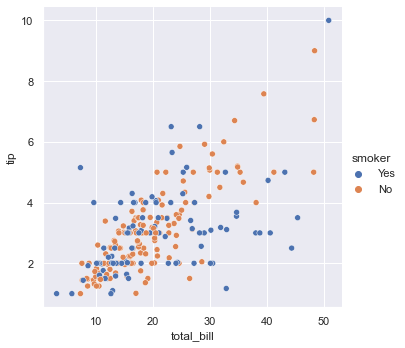

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

为了强调类之间的差异，并提高可访问性，可以为每个类使用不同的标记 `style`:

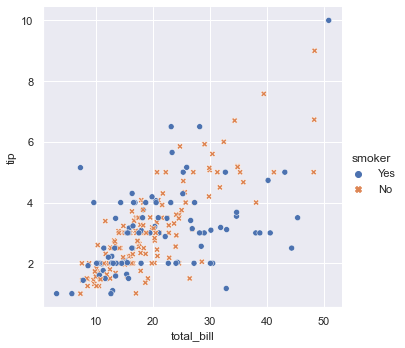

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

也可以通过改变每个点的 `hue` 和 `style` 来表示4个变量。但这应该小心进行，因为眼睛对形状的敏感度远不如对颜色的敏感度:

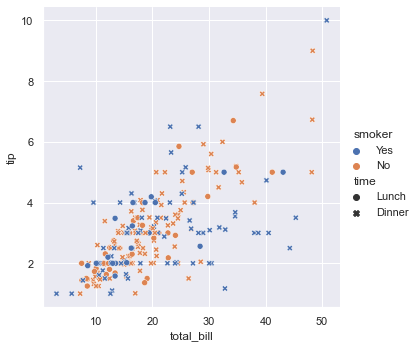

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

在上面的例子中，`hue` 的语义是绝对的，因为应用了默认的 qualitative palette。如果颜色语义是 numeric (特别是，如果它可以转换为 float )，默认颜色切换到 sequential palette:

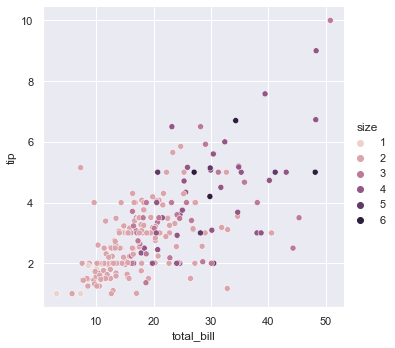

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

在这两种情况下，您都可以定制  color palette。这样做有很多选择。这里，我们使用 `cubehelix_palette()` 的字符串接口定制一个 sequential palette。

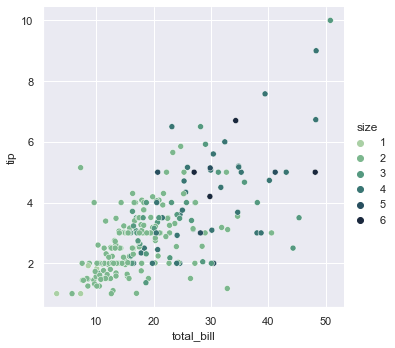

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

第三类 semantic variable 改变每个点的大小:

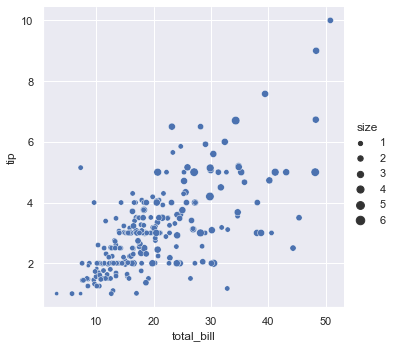

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

与matplotlib.pyplot.scatter()不同，literal value of the variable 并不用于选择点的区域。相反，数据单位中的值范围被规范化为以面积单位表示的范围。这个范围可以定制:

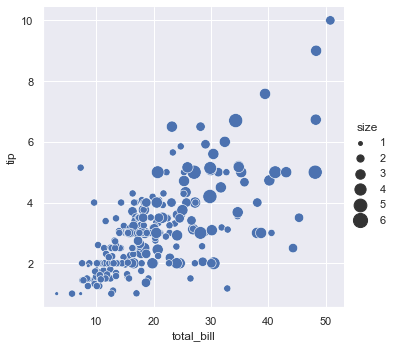

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

在 `scatterplot()` API示例中显示了更多自定义如何使用不同语义来显示统计关系的示例。

## Emphasizing continuity with line plots

散点图是非常有效的，但没有普遍最佳可视化类型。相反，视觉表示应该适应数据集的细节和您试图用 plot 回答的问题。

对于一些数据集，您可能希望将一个变量的变化理解为时间的函数，或者类似的连续变量。在这种情况下，一个好的选择是画一个线形图。在 seaborn 中，这可以通过 `lineplot()` 函数来完成，可以直接完成，也可以通过在 `relplot()` 中设置 `kind="line"` 来完成:

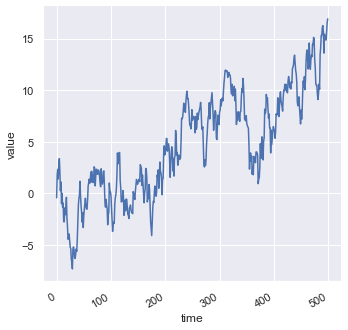

In [15]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

因为 `lineplot()` 假设您经常尝试将 `y` 作为 `x` 的函数来绘制，所以默认行为是在绘制之前根据 `x` 值对数据进行排序。但是，这是可以禁用的：

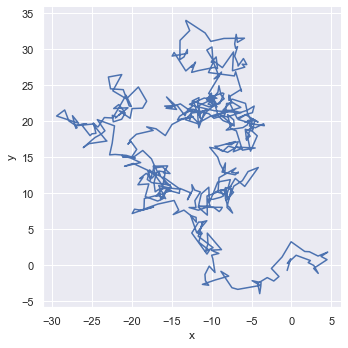

In [16]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

## Aggregation and representing uncertainty

更复杂的数据集将对变量 `x` 的相同值进行多次测量。seaborn的默认行为是通过绘制平均值和平均值周围的95%置信区间来聚合每个x值的多个度量值。

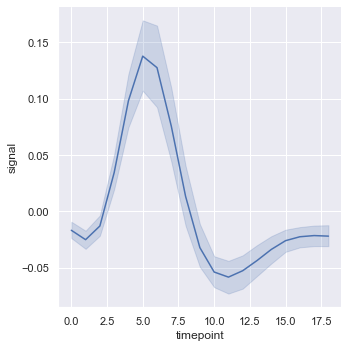

In [20]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

置信区间是使用bootstrapping计算的，这对于较大的数据集来说可能是耗时的。因此，可以禁用它们:

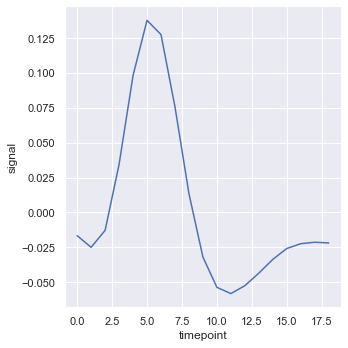

In [22]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

另一个不错的选择，特别是对于较大的数据，是通过绘制标准差而不是置信区间来表示每个时间点的分布:

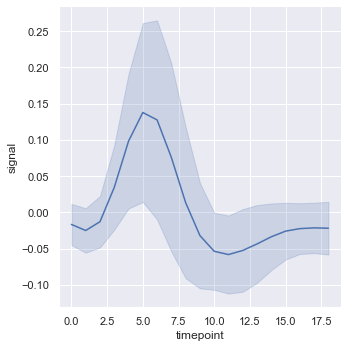

In [26]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

要完全关闭聚合，请将 `estimator` 参数设置为 None。当数据在每个点都有多个观测值时，这可能会产生奇怪的效果。

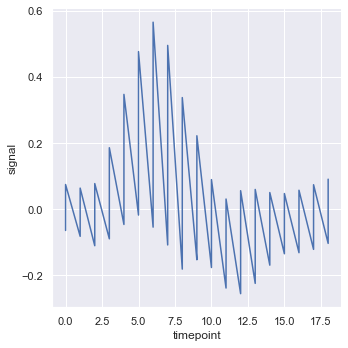

In [28]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

## Plotting subsets of data with semantic mappings

`lineplot()` 函数具有与 `scatterplot()` 相同的灵活性: 通过修改 plot 元素的 `hue`、`size` 和 `style`，它最多可以显示三个额外的变量。它使用与 `scatterplot()` 相同的API来实现这一点，这意味着我们不需要停下来考虑`matplotlib` 中控制线与点外观的参数。

在 `lineplot()` 中使用语义还将决定如何聚合数据。例如，添加两个层次的 `hue` 语义会将图分成两条线和 error bands，分别着色以表明它们对应的是数据的哪个子集。

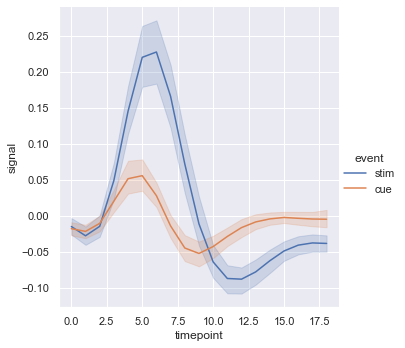

In [30]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

在线条图中添加 `style` 语义会在默认情况下更改 pattern of dashes in the line

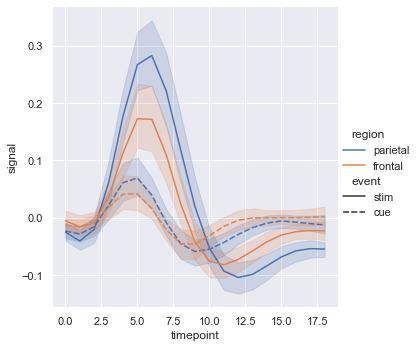

In [31]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)

但是您可以通过在每个 observation 使用标记来识别子集，或者与破折号一起使用，或者代替破折号

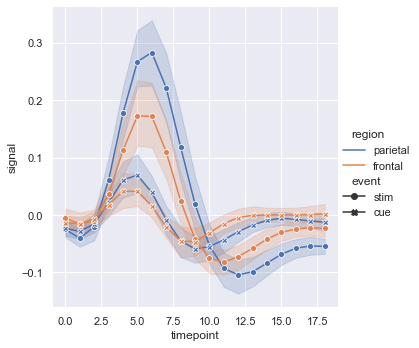

In [32]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes=False, markers=True, kind="line", data=fmri)

与散点图一样，使用多重语义制作线图时要谨慎。虽然有时信息丰富，但它们也很难解析和解释。但是，即使当您只检查一个附加变量的变化时，更改线条的 `hue` 和 `style` 也是有用的。这可以使 plot 更容易印成黑白或有色盲的人看。

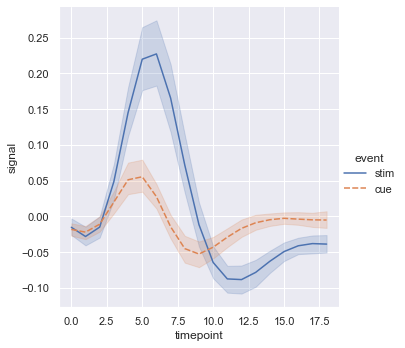

In [33]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri)

当您处理重复的度量数据时(也就是说，您有多次采样的单元)，您还可以分别绘制每个采样单元，而不需要通过语义来区分它们。这样可以避免使 legend 混乱：

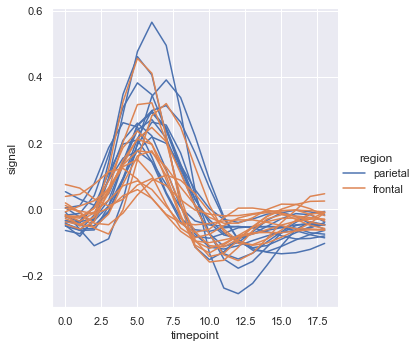

In [34]:
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", estimator=None, kind="line", data=fmri.query("event=='stim'"))

`lineplot()` 中默认的 colormap 和 legend 的处理也取决于 `hue` 语义是 categorical 还是 numeric:

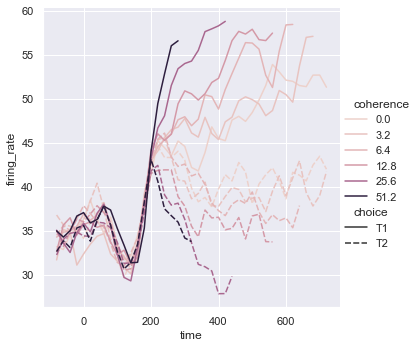

In [35]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", kind="line", data=dots)

有可能，即使 `hue` 变量是 numetric ，它也不能用 linera color scale 来表示。这就是这里的情况，`hue` 变量的水平是对数缩放。您可以通过传递列表或字典为每一行提供特定的颜色值。

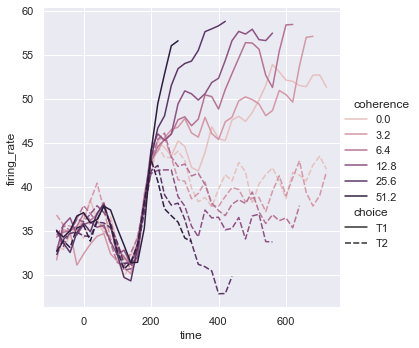

In [38]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", palette=palette, kind="line", data=dots)

或者您可以改变 colormap 的 normalize 方式:

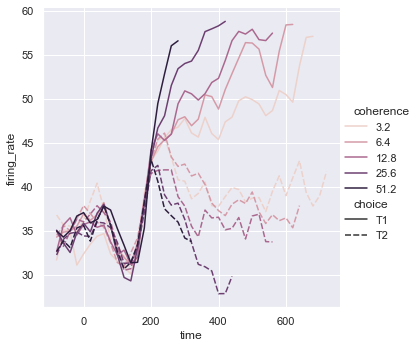

In [39]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate", 
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line",
            data=dots.query("coherence > 0"))

第三个语义，`size`，改变行宽:

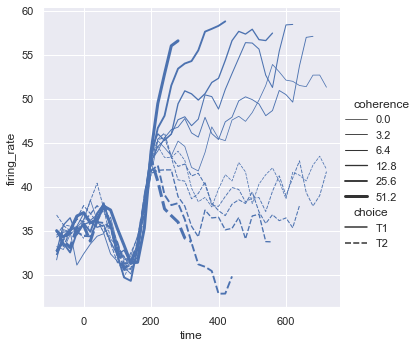

In [41]:
sns.relplot(x="time", y="firing_rate", size="coherence", style="choice", kind="line", data=dots)

虽然 `size` 变量通常是 numeric，但也可以将一个 categorical 变量映射为线条的宽度。在这样做的时候要小心，因为它会比粗线和细线更难区分。然而，当线条有高频变化时，破折号可能很难察觉，所以在这种情况下使用不同的宽度可能会更有效:

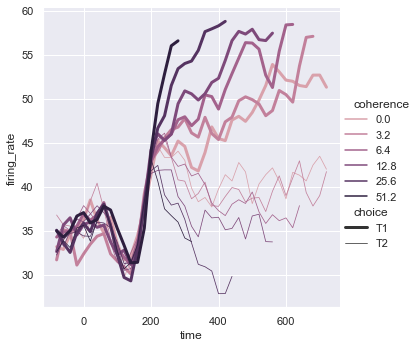

In [42]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice",
            palette=palette,
            kind="line", data=dots)

## Plotting with date data

线图通常用于可视化与实际日期和时间相关联的数据。这些函数将原始格式的数据传递给底层的 `matplotlib` 函数，因此它们可以利用 `matplotlib` 在标记标签中格式化日期的能力。但是所有的格式化发生在 matplotlib layer， 你应该在 matplotlib 文档中查看它是如何工作的：

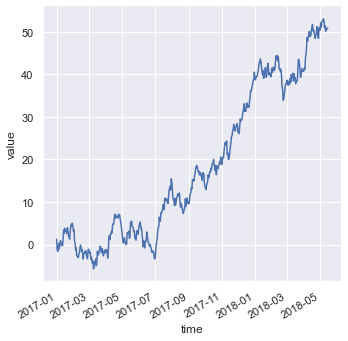

In [44]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

## Showing multiple relationships with facets

我们在本教程中强调，虽然这些函数可以同时显示多个语义变量，但这样做并不总是有效的。但是如果你想要理解两个变量之间的关系是如何依赖于多个变量的呢？

最好的方法可能是制作多个 plot。因为 `relplot()` 基于 `FacetGrid`，所以这很容易做到。要显示附加变量的影响，不要将其分配给 plot 中的某个语义角色，而要使用它对可视化进行 "facet" 处理。这意味着您要创建多个轴，并在每个轴上绘制数据子集:

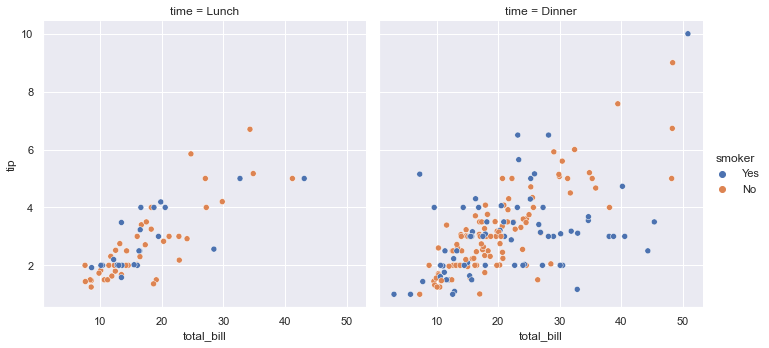

In [45]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

您还可以以这种方式显示两个变量的影响:一个是在列上 faceting，另一个是在行上 faceting。当您开始向网格添加更多变量时，您可能希望减小图形大小。记住，`FacetGrid` 的大小是由每个 facet 的高度和纵横比参数化的:

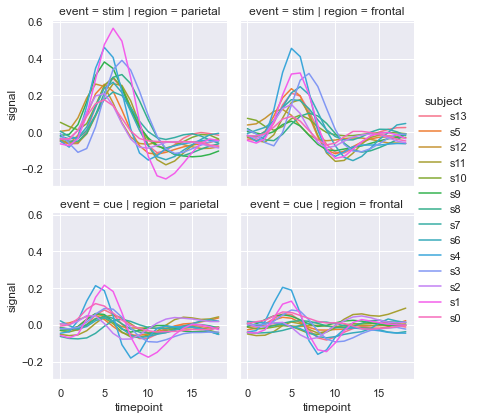

In [46]:
sns.relplot(x="timepoint", y="signal", hue="subject", 
            col="region", row="event", height=3, 
            kind="line", estimator=None, data=fmri)

当您希望跨变量的多个级别检查影响时，最好在列上刻入该变量，然后将这些刻入行中：

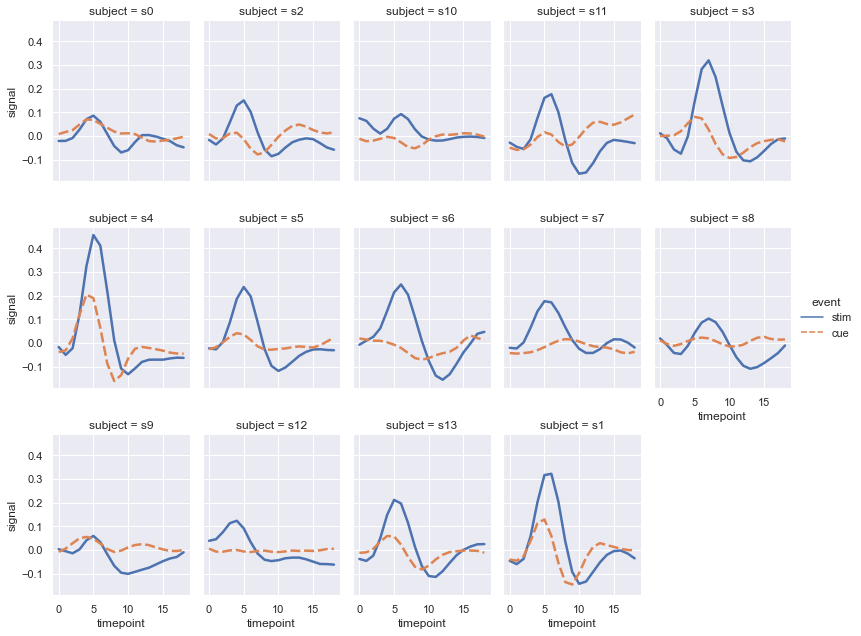

In [49]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5, 
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

这些可视化(通常称为 “lattice”  图或 “small-multiples” 图)非常有效，因为它们以一种便于肉眼检测总体模式和偏离这些模式的格式显示数据。虽然您应该利用 `scatterplot()` 和 `relplot()` 提供的灵活性，但始终要记住，几个简单的plot通常比一个复杂的plot更有效。